In [1]:
import pandas as pd
import os
from glob import glob
import numpy as np
from google.colab import drive, files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting Google Drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/intern/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to load and preprocess data
def load_and_preprocess_data(folder_path):
    all_data = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)

            df = pd.read_csv(file_path)

            required_columns = ['Time', 't1', 't2']
            if not all(col in df.columns for col in required_columns):
                raise ValueError(f"File {file_name} is missing one or more required columns: {required_columns}")

            df.set_index('Time', inplace=True)

            df.sort_index(inplace=True)
            all_data.append(df)

    consolidated_df = pd.concat(all_data)

    return consolidated_df

data = load_and_preprocess_data(folder_path)

print("Data successfully loaded and preprocessed!")


Data successfully loaded and preprocessed!


In [ ]:
data_dir = folder_path
file_pattern = os.path.join(data_dir, '*.csv')

dataframes = []
for i, file in enumerate(glob(file_pattern)):
    df = pd.read_csv(file)
    df['Run_ID'] = i  # Assigning a unique ID for each file
    dataframes.append(df)

consolidated_df = pd.concat(dataframes, axis=0, ignore_index=True)

In [5]:
consolidated_df.to_csv('consolidated_df.csv')
consolidated_df.head(10)

,Unnamed: 0,Time,t1,t2,Run_ID
0,0,61,0.782415,0.065620,0
1,1,62,1.119149,0.202890,0
2,2,63,0.854768,0.052104,0
3,3,64,0.599453,0.027893,0
4,4,65,0.327612,0.101095,0
5,5,66,-0.305481,-0.063950,0
6,6,67,0.669455,-0.047018,0
7,7,68,0.577965,0.117214,0
8,8,69,-0.672442,-0.203733,0
9,9,70,1.811058,0.082822,0


In [6]:
df = consolidated_df.copy(deep = True)
print(df.info())
print()
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981414 entries, 0 to 981413
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  981414 non-null  int64  
 1   Time        981414 non-null  int64  
 2   t1          981414 non-null  float64
 3   t2          981414 non-null  float64
 4   Run_ID      981414 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 37.4 MB
None

Unnamed: 0     22379
Time           22379
t1            804109
t2            968951
Run_ID            45
dtype: int64


In [7]:
# Summary statistics for t1 and t2
summary_stats = df[['t1', 't2']].describe(percentiles=[0.25, 0.5, 0.75])
print("Summary Statistics for t1 and t2:")
print(summary_stats)

# Calculating specific percentiles
percentiles = df[['t1', 't2']].quantile([0.1, 0.9])
print("\n10th and 90th Percentiles for t1 and t2:")
print(percentiles)


Summary Statistics for t1 and t2:
                  t1             t2
count  981414.000000  981414.000000
mean       -0.000125       0.002857
std         0.576996       0.301435
min       -19.600000      -1.000094
25%        -0.261600      -0.187575
50%         0.001335       0.001162
75%         0.265279       0.190499
max         9.861404       1.000003

10th and 90th Percentiles for t1 and t2:
           t1        t2
0.1 -0.620101 -0.373871
0.9  0.619114  0.378578


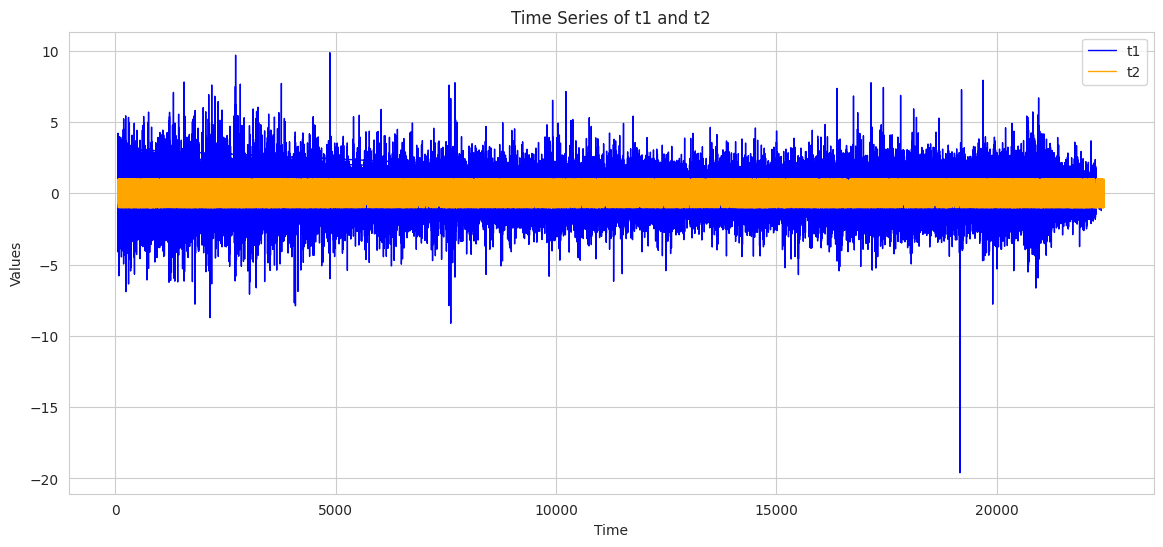

In [8]:
# Set up the plotting style
sns.set_style('whitegrid')

# Plot t1 and t2 against Time
plt.figure(figsize=(14, 6))
plt.plot(df['Time'], df['t1'], label='t1', color='blue', linewidth=1)
plt.plot(df['Time'], df['t2'], label='t2', color='orange', linewidth=1)
plt.title('Time Series of t1 and t2')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


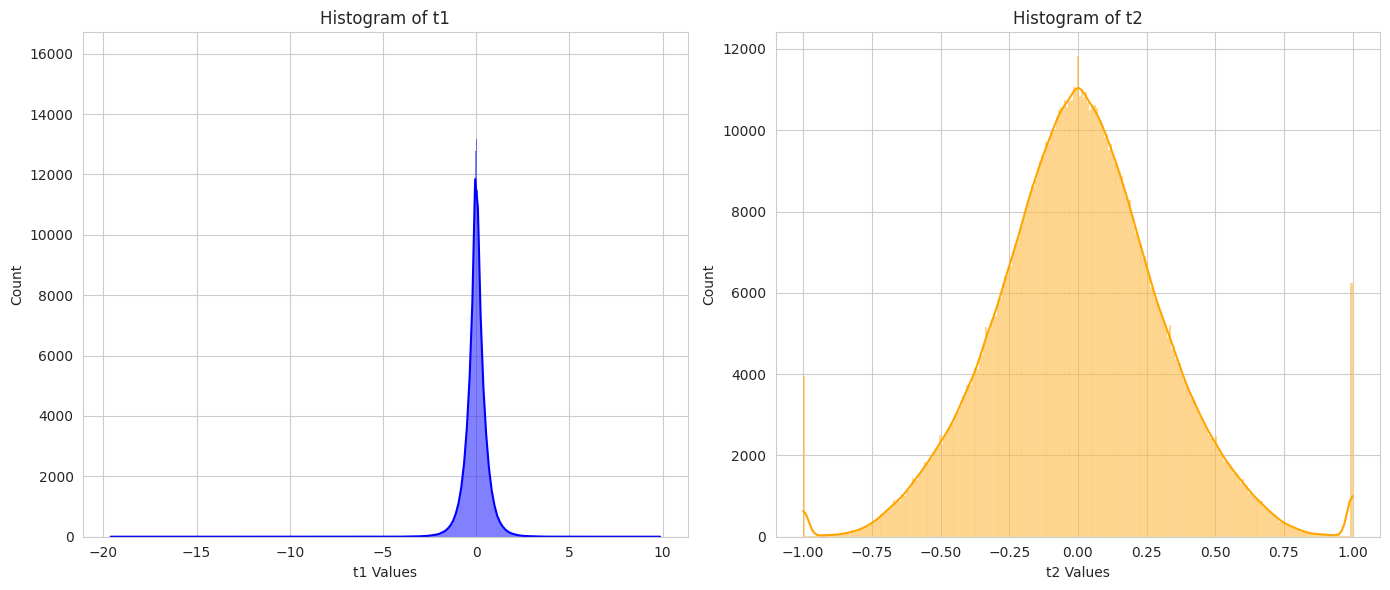

In [ ]:
# Plotting histograms for t1 and t2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # Subplot for t1
sns.histplot(df['t1'], kde=True, color='blue')
plt.title('Histogram of t1')
plt.xlabel('t1 Values')

plt.subplot(1, 2, 2)  # Subplot for t2
sns.histplot(df['t2'], kde=True, color='orange')
plt.title('Histogram of t2')
plt.xlabel('t2 Values')

plt.tight_layout()  
plt.show()


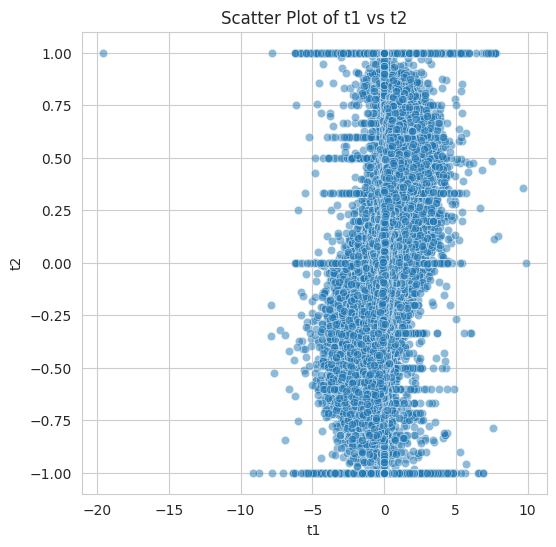

In [ ]:
# Plotting scatter plot to compare t1 and t2
plt.figure(figsize=(6, 6))
sns.scatterplot(x='t1', y='t2', data=df, alpha=0.5)
plt.title('Scatter Plot of t1 vs t2')
plt.xlabel('t1')
plt.ylabel('t2')
plt.show()


<ipython-input-11-b359db355fb5>:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


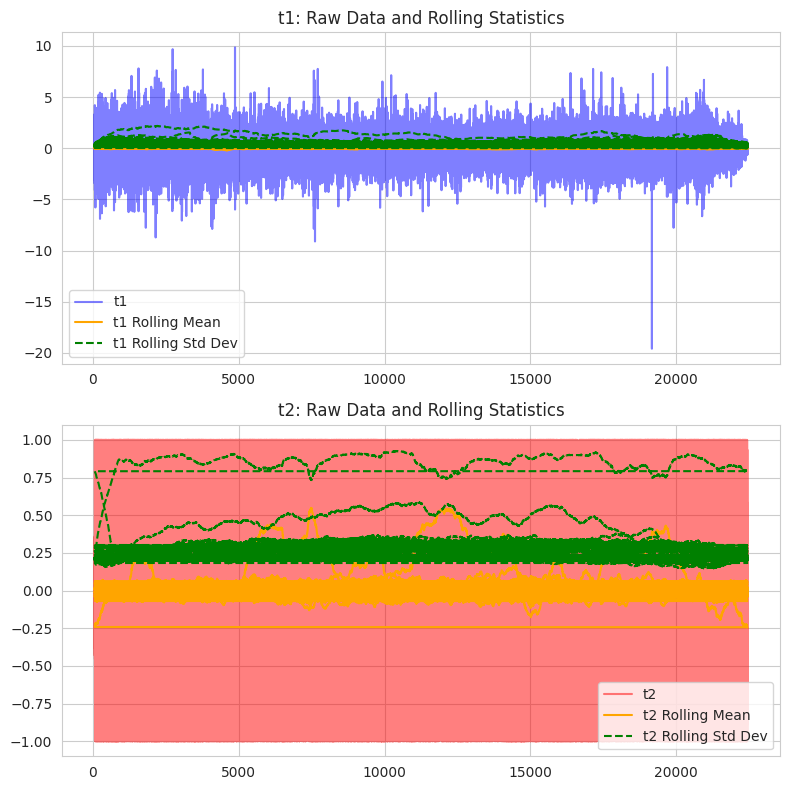

In [11]:
# Setting a window size (3600 for 1-hour moving average, 600 for 10 min)
window_size = 600

# Rolling mean and standard deviation for t1 and t2
df['t1_rolling_mean'] = df['t1'].rolling(window=window_size).mean()
df['t1_rolling_std'] = df['t1'].rolling(window=window_size).std()

df['t2_rolling_mean'] = df['t2'].rolling(window=window_size).mean()
df['t2_rolling_std'] = df['t2'].rolling(window=window_size).std()

plt.figure(figsize=(8, 8))

# Plot for t1
plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['t1'], label='t1', color='blue', alpha=0.5)
plt.plot(df['Time'], df['t1_rolling_mean'], label='t1 Rolling Mean', color='orange')
plt.plot(df['Time'], df['t1_rolling_std'], label='t1 Rolling Std Dev', color='green', linestyle='--')
plt.title('t1: Raw Data and Rolling Statistics')
plt.legend()

# Plot for t2
plt.subplot(2, 1, 2)
plt.plot(df['Time'], df['t2'], label='t2', color='red', alpha=0.5)
plt.plot(df['Time'], df['t2_rolling_mean'], label='t2 Rolling Mean', color='orange')
plt.plot(df['Time'], df['t2_rolling_std'], label='t2 Rolling Std Dev', color='green', linestyle='--')
plt.title('t2: Raw Data and Rolling Statistics')
plt.legend()

plt.tight_layout()
plt.show()


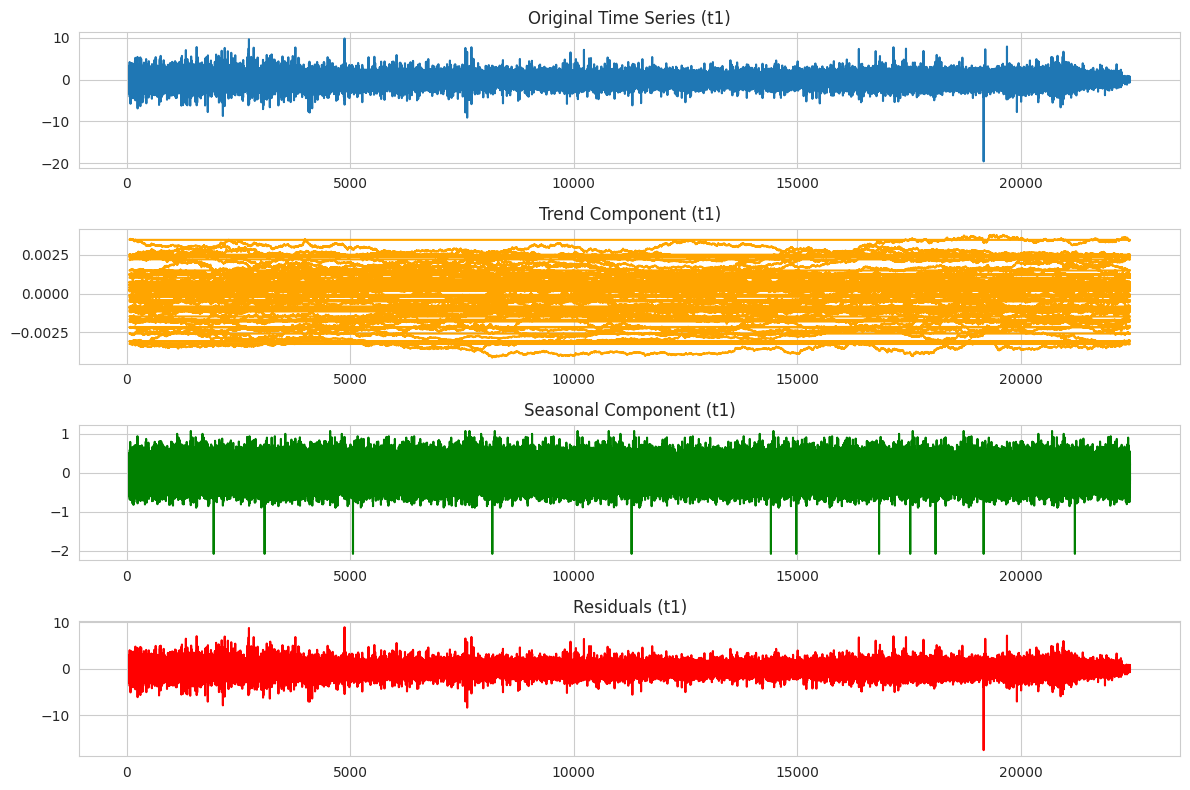

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for t1 and t2
decomposition_t1 = seasonal_decompose(df['t1'], model='additive', period=86400) # Assuming 1 day period (24*60*60 seconds)
decomposition_t2 = seasonal_decompose(df['t2'], model='additive', period=86400)

# Plot decomposition for t1
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Time'], df['t1'], label='Original (t1)')
plt.title('Original Time Series (t1)')
plt.subplot(4, 1, 2)
plt.plot(df['Time'], decomposition_t1.trend, label='Trend', color='orange')
plt.title('Trend Component (t1)')
plt.subplot(4, 1, 3)
plt.plot(df['Time'], decomposition_t1.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component (t1)')
plt.subplot(4, 1, 4)
plt.plot(df['Time'], decomposition_t1.resid, label='Residuals', color='red')
plt.title('Residuals (t1)')
plt.tight_layout()
plt.show()



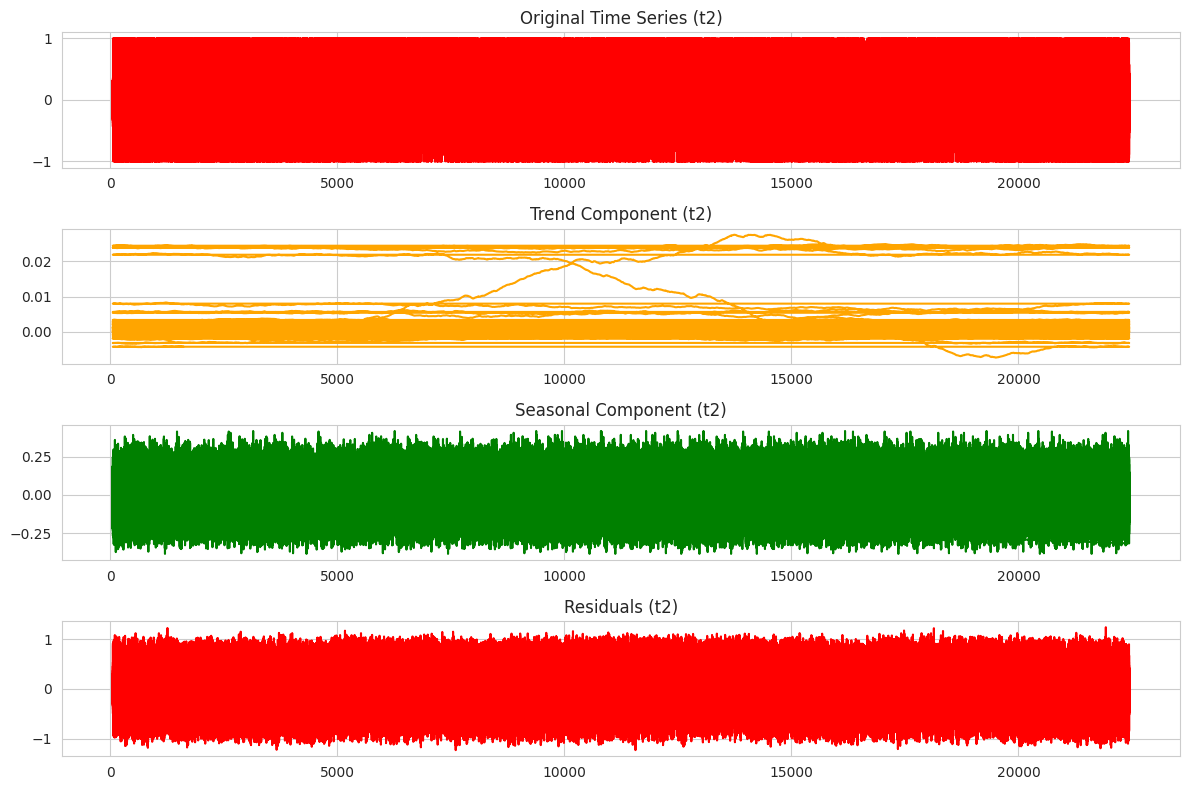

In [13]:
# Repeat for t2
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Time'], df['t2'], label='Original (t2)', color='red')
plt.title('Original Time Series (t2)')
plt.subplot(4, 1, 2)
plt.plot(df['Time'], decomposition_t2.trend, label='Trend', color='orange')
plt.title('Trend Component (t2)')
plt.subplot(4, 1, 3)
plt.plot(df['Time'], decomposition_t2.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component (t2)')
plt.subplot(4, 1, 4)
plt.plot(df['Time'], decomposition_t2.resid, label='Residuals', color='red')
plt.title('Residuals (t2)')
plt.tight_layout()
plt.show()

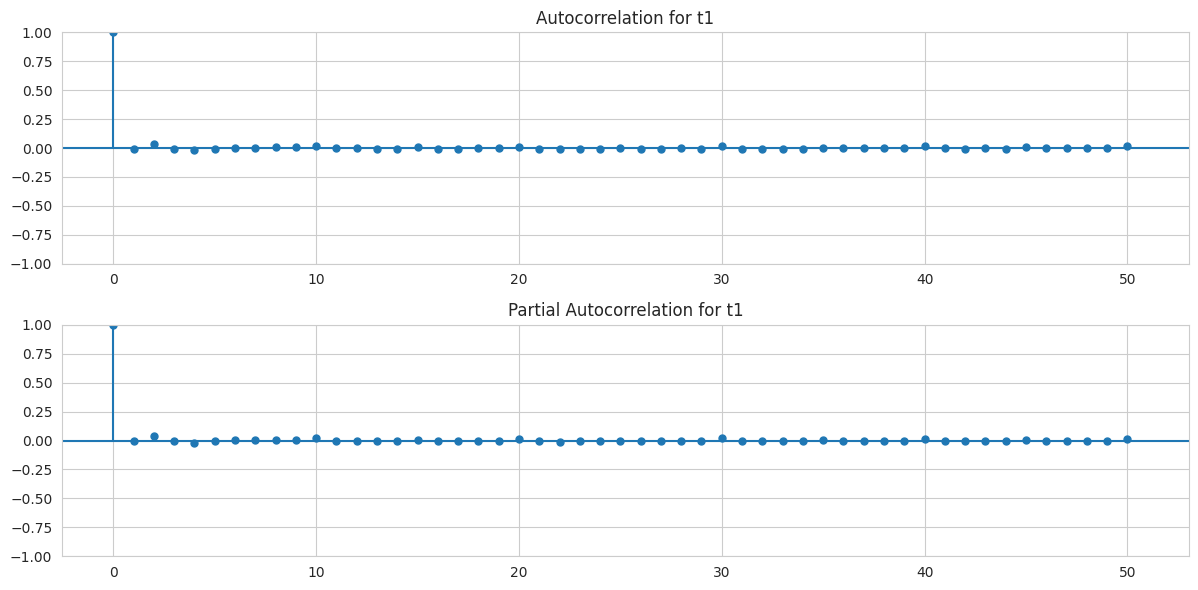

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF for t1
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['t1'].dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation for t1')

plt.subplot(2, 1, 2)
plot_pacf(df['t1'].dropna(), lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation for t1')
plt.tight_layout()
plt.show()


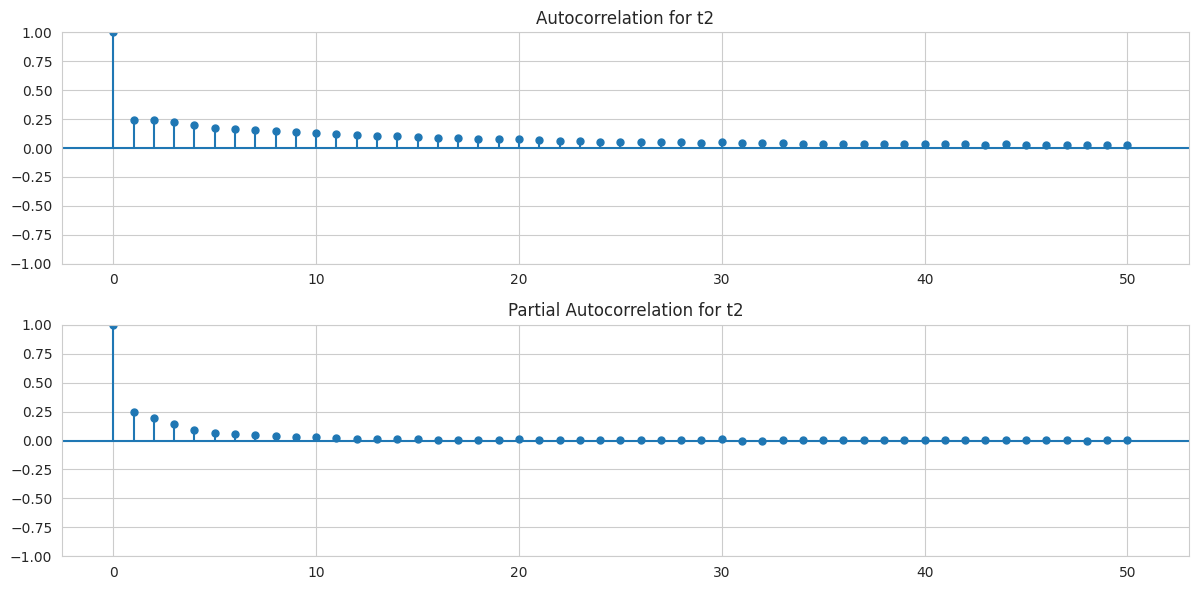

In [15]:
# ACF and PACF for t2
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['t2'].dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation for t2')

plt.subplot(2, 1, 2)
plot_pacf(df['t2'].dropna(), lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation for t2')
plt.tight_layout()
plt.show()
